In [1]:
#importing the libararies
import pandas as pandasd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load and read the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\PYTHON\COMPLETED\customer_segmemtation\Mall_Customers.csv")
df.head()

<IPython.core.display.Javascript object>

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#Check the datatype of each of the variable in the dataset
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#check if dataset has any null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Drop the customer_id column since we dont require it the  to analyse the data
df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Create a distribution Plot for Age, Annual Income and Spending Score (1-100)

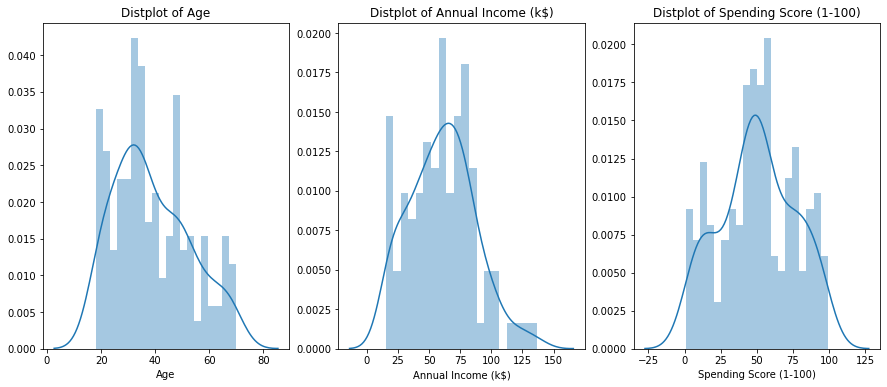

In [8]:
plt.figure(1, figsize = (15,6))
n = 0
for i in  (["Age","Annual Income (k$)","Spending Score (1-100)"]):
    n = n+1
    plt.subplot(1,3,n)
    sns.distplot(df[i], bins= 20)
    plt.title("Distplot of {}".format(i))
plt.show()

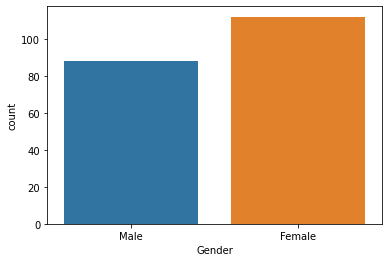

In [9]:
#Count the males and females using a countplot
sns.countplot(x="Gender", data=df)

#### Represent the violin distribution for Age, Annual Income and Spending Score (1-100)

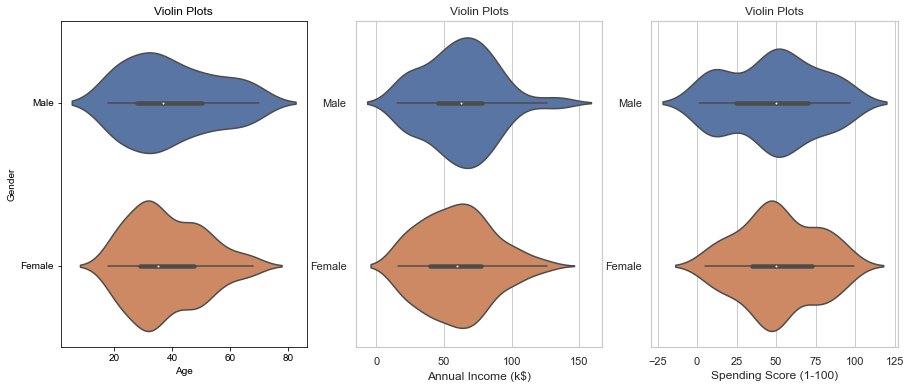

In [10]:
plt.figure(1, figsize = (15,6))
n=0
for col in (["Age","Annual Income (k$)","Spending Score (1-100)"]):
    n = n+1
    plt.subplot(1,3,n)
    sns.set(style = "whitegrid")
    sns.violinplot(x= col, y = "Gender", data= df)
    plt.title("Violin Plots")
    plt.ylabel("Gender" if n ==1 else "")
    

#### 1.For indepth analysis,lets find the number of customers in each age group
#### lets categorize the age variable and check the range having highest customers

In [11]:
# the min and max ages of the dataset are 18 and 70
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55_above = df.Age[df.Age >=56]

In [12]:
len_ages= [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]
len_ages

[38, 60, 36, 37, 29]

#### Generate a Barplot with x as its age and y as its len_ages

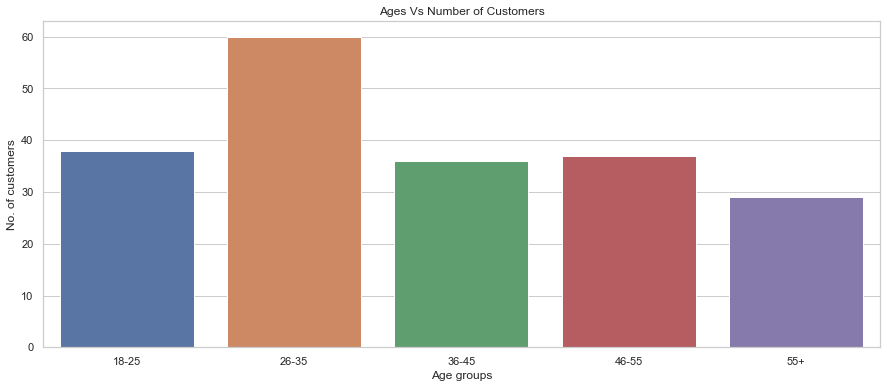

In [13]:
#Define the x and y axis of the barplot
agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = len_ages

plt.figure(1, figsize=(15,6))
sns.barplot(x=agex, y=len_ages, data=df)
plt.title("Ages Vs Number of Customers")
plt.xlabel("Age groups")
plt.ylabel("No. of customers")
plt.show()

#### 2.Find the number of customers in each Spending Score group ,
#### Lets categorize Spending score variable and and check the range having highest customers

In [14]:
# the min and max  values of Spending Score are 1 and 99
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <=80)]
ss_81_above = df["Spending Score (1-100)"][df["Spending Score (1-100)"] >=81]

len_ss = [len(ss_1_20.values),len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_above.values)]
len_ss
                                        
                                        

[36, 27, 75, 32, 30]

#### Generate a Barplot with x as itsSpending score and y as its len_ss

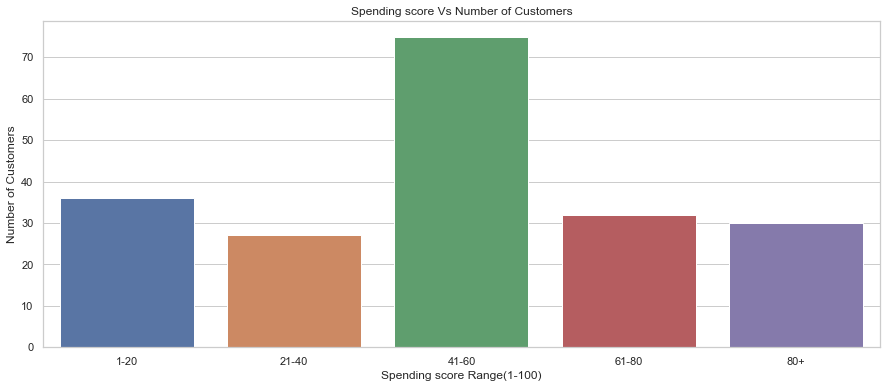

In [15]:
plt.figure(1, figsize = (15,6))
#Define the x and y axis for the barplot
ssx = ["1-20","21-40", "41-60", "61-80", "80+"]
ssy = len_ss
sns.barplot(x = ssx, y = ssy)
plt.title("Spending score Vs Number of Customers")
plt.xlabel("Spending score Range(1-100)")
plt.ylabel("Number of Customers")
plt.show()

#### 3.Find the number of customers in each Annual Income group ,
#### Lets categorize Annual Income  variable and and check the range having highest customers

In [16]:
# the min and max  values of Annual Income are 15 and 137
ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai_121_above = df["Annual Income (k$)"][df["Annual Income (k$)"] >= 121]

len_ai = [len(ai_0_30.values),len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_above.values)]
len_ai     

[32, 66, 80, 18, 4]

#### Generate a Barplot with x as its Annual Income and y as its len_ai

Text(0, 0.5, 'Number of Customers')

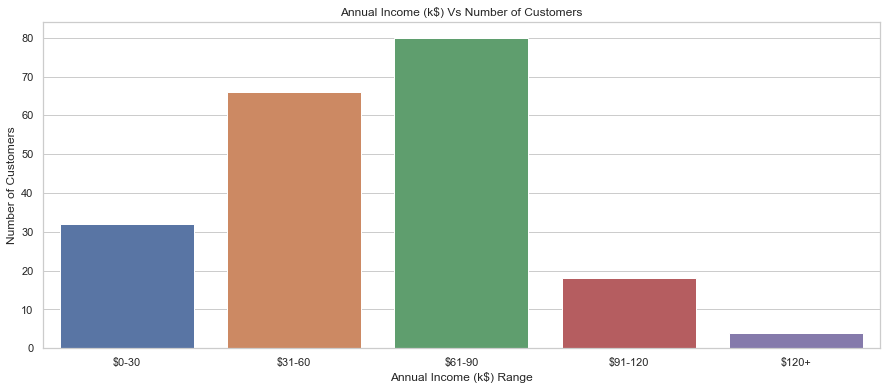

In [17]:
#Define x and y axis for the barplot
aix = ["$0-30","$31-60","$61-90", "$91-120", "$120+"]
aiy = len_ai
plt.figure(1, figsize = (15,6))
sns.barplot(x = aix, y=aiy )
plt.title("Annual Income (k$) Vs Number of Customers")
plt.xlabel("Annual Income (k$) Range")
plt.ylabel("Number of Customers")

#### 4.Analysize the realtionship between Annual Income and Spending Score wrt Age

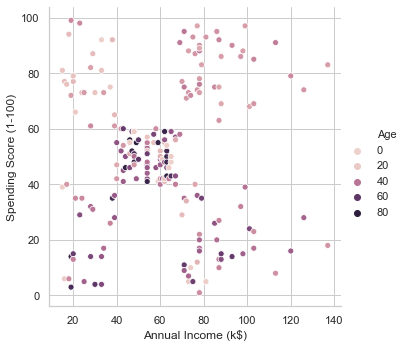

In [18]:
sns.relplot(data=df, x="Annual Income (k$)", y= "Spending Score (1-100)", hue="Age")

## Lets start with the Clustering Process

#### Find the optimum number of clusters that we need to create

#### 1. Lets take Age And Spending Score and Cluster the dataset accordingly

In [19]:
#create an subset of data with age and Spending score as its values
Xa_ss = df.loc[:, ["Age", "Spending Score (1-100)"]]
Xa_ss

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


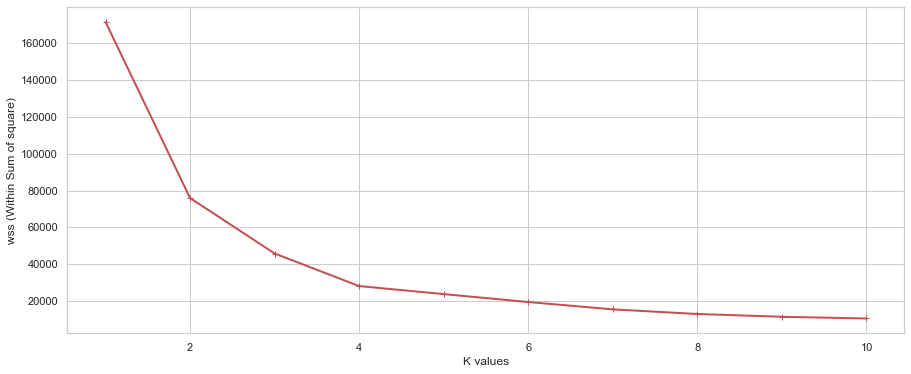

In [20]:
#Import KMeans
from sklearn.cluster import KMeans
wss = [] #within the sum of squares
for k in range(1,11): #take the range of Kvalues 1-10
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Xa_ss) #Fit the subset of data
    wss.append(kmeans.inertia_) #inertia_ : Sum of squared distances of samples to their closest cluster center.

#Plot the Figure
plt.figure(1, figsize=(15,6))
plt.plot(range(1,11), wss, color='r', linewidth=2.0 , marker = "+")
plt.xlabel("K values")
plt.ylabel("wss (Within Sum of square)")
plt.show()

#Number of optimal clusters for the dataset is 4

In [21]:
kmeans = KMeans(n_clusters=4)
label =kmeans.fit_predict(Xa_ss) 
label #view the labels of the cluster

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [22]:
#Check the centroids for the above cluster
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

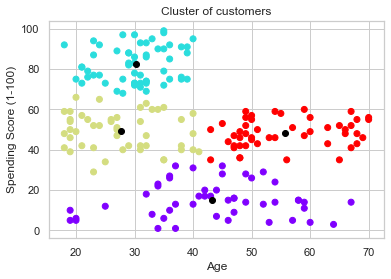

In [23]:
#Plot the clusters on the graph
plt.scatter(Xa_ss["Age"], Xa_ss["Spending Score (1-100)"], c= kmeans.labels_,cmap='rainbow')

#Plot the cluster Centres
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black") #cluster centres in black color
plt.title("Cluster of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### 2. Lets take Annual Income And Spending Score and Cluster the dataset accordingly

In [24]:
#create an subset of data with Annual Income (k$) and Soending score as its values
Xai_ss = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]]
Xai_ss

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


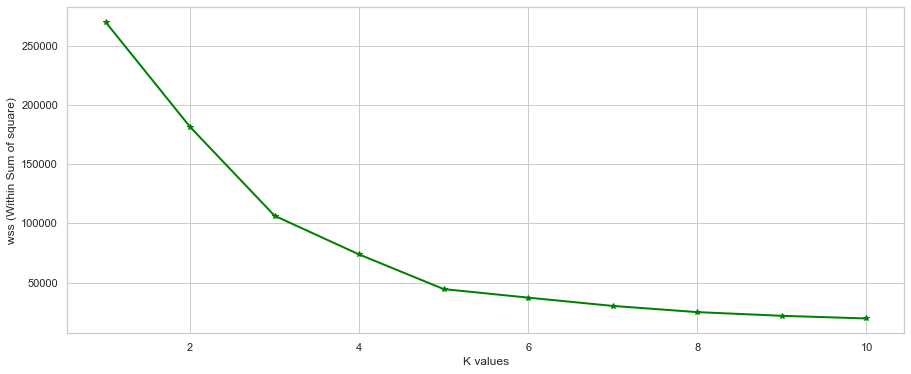

In [25]:
wss = [] # within the sum of squares
for k in range(1,11): #take the range of K values from 1-10
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Xai_ss) #Fit the subset of data into the Kmeans algorithm
    wss.append(kmeans.inertia_) #inertia_ : Sum of squared distances of samples to their closest cluster center.

#Plot the Figure
plt.figure(1, figsize=(15,6))
plt.plot(range(1,11), wss, color='green', linewidth=2.0 , marker = "*")
plt.xlabel("K values")
plt.ylabel("wss (Within Sum of square)")
plt.show()
    

In [26]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(Xai_ss) #view the labels of the cluster
label

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [27]:
#check the centroids of the above cluster
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

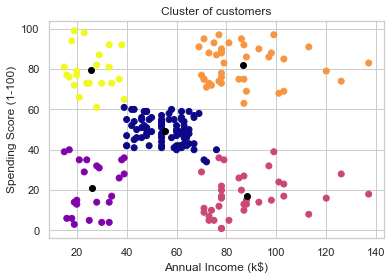

In [28]:
#Plot the cluster on the graph
plt.scatter(Xai_ss["Annual Income (k$)"], Xai_ss["Spending Score (1-100)"], c= kmeans.labels_, cmap="plasma")

#plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "black") #cluster centroids are in black color
plt.title("Cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### 3. Lets take all the three variables Age, Annual Income And Spending Score and Cluster the dataset accordingly

In [29]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [30]:
X3= df[["Age","Annual Income (k$)","Spending Score (1-100)"]] #load all the three vaiables
X3

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


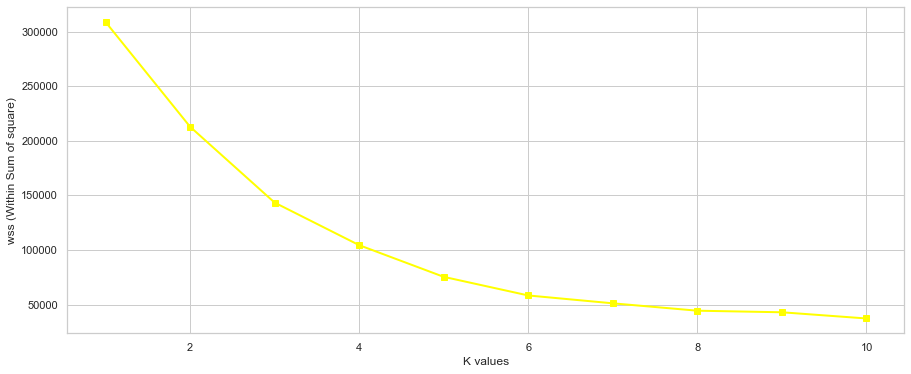

In [31]:
wss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit(X3)
    wss.append(kmeans.inertia_)
#Plot the Figure
plt.figure(1, figsize=(15,6))
plt.plot(range(1,11), wss, color='yellow', linewidth=2.0 , marker = "s")
plt.xlabel("K values")
plt.ylabel("wss (Within Sum of square)")
plt.show()

In [32]:
kmeans =KMeans(n_clusters=5)
df["label"] = kmeans.fit_predict(X3)
df["label"]

0      2
1      4
2      2
3      4
4      2
      ..
195    1
196    3
197    1
198    3
199    1
Name: label, Length: 200, dtype: int32

In [33]:
#check the centroids
kmeans.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

In [34]:
df["Age"][df["label"] == 0]

46     50
47     27
48     29
49     31
50     49
       ..
120    27
121    38
122    40
126    43
142    28
Name: Age, Length: 79, dtype: int64

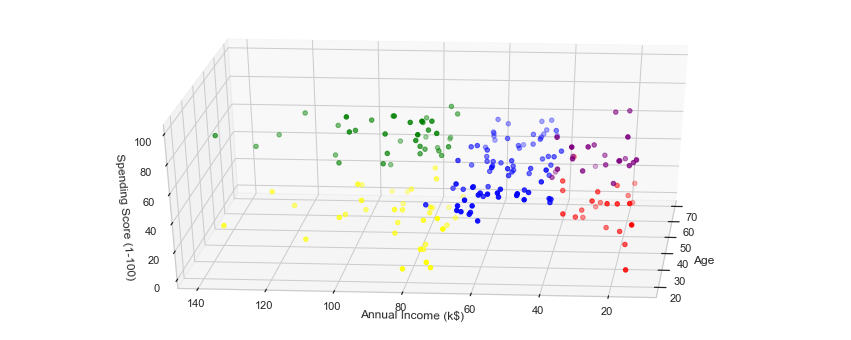

In [37]:
#Plot the cluster on the a 3Dgraph
#import the 3D toolkit
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111, projection= "3d")
ax.scatter(df['Age'][df["label"] == 0], df["Annual Income (k$)"][df["label"] == 0], df["Spending Score (1-100)"][df["label"] == 0],c = "blue")
ax.scatter(df['Age'][df["label"] == 1], df["Annual Income (k$)"][df["label"] == 1], df["Spending Score (1-100)"][df["label"] == 1],c = "green")
ax.scatter(df['Age'][df["label"] == 2], df["Annual Income (k$)"][df["label"] == 2], df["Spending Score (1-100)"][df["label"] == 2],c = "red")
ax.scatter(df['Age'][df["label"] == 3], df["Annual Income (k$)"][df["label"] == 3], df["Spending Score (1-100)"][df["label"] == 3],c = "yellow")
ax.scatter(df['Age'][df["label"] == 4], df["Annual Income (k$)"][df["label"] == 4], df["Spending Score (1-100)"][df["label"] == 4],c = "purple")
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()